Обработка дата сета:

In [56]:
import numpy as np
import pandas as pd

In [57]:
data = pd.read_csv('./data_set/jamb_exam_results.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [58]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
JAMB_Score,192,207,182,210,199,202,251,129,220,157,...,234,136,189,200,233,183,179,261,183,218
Study_Hours_Per_Week,22,14,29,29,12,25,35,27,23,15,...,25,19,17,17,19,20,0,17,15,34
Attendance_Rate,78,88,87,99,98,85,85,75,85,79,...,74,85,87,89,81,74,80,89,96,100
Teacher_Quality,4,4,2,2,3,2,4,3,3,3,...,2,2,4,3,3,2,2,3,2,1
Distance_To_School,12.4,2.7,9.6,2.6,8.8,13.6,2.6,9.4,4.6,15.6,...,3.4,15.6,13.2,5.8,7.8,10.6,20.0,11.3,15.9,7.0
School_Type,Public,Public,Public,Public,Public,Public,Public,Public,Public,Public,...,Public,Public,Private,Private,Public,Public,Public,Public,Public,Public
School_Location,Urban,Rural,Rural,Urban,Urban,Urban,Urban,Urban,Rural,Rural,...,Rural,Rural,Rural,Urban,Urban,Urban,Rural,Urban,Rural,Urban
Extra_Tutorials,Yes,No,Yes,No,No,Yes,No,No,No,No,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
Access_To_Learning_Materials,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes
Parent_Involvement,High,High,High,Medium,Medium,Medium,Low,Low,Low,Low,...,High,Medium,Low,High,Low,Low,Medium,Low,Low,Medium


In [59]:
def edit_data(data : pd.DataFrame, columns: list, bool_columns:list, LMH_columns: list,) -> pd.DataFrame:
    
    for i_columns in columns:
        try:
            data = pd.concat([
            data.drop(i_columns, axis=1),
            pd.get_dummies(data[i_columns])
            ],axis=1)
        except:
            print('Error get_dummies: Not columns '+i_columns)

    for i_columns in bool_columns:
        try:
            data[i_columns] = data[i_columns].map(lambda item: item == 'Yes')
        except:
            print('Error get_bool: Not columns '+i_columns)

    LHM = [0, 5, 10]
    for i_columns in LMH_columns:
        try:
            data[i_columns] = data[i_columns].map(lambda item: (item == 'Low')*LHM[0]+(item == 'Medium')*LHM[1]+(item == 'High')*LHM[2])
        except:
            print('Error get_bool: Not columns '+i_columns)
    return data

In [60]:
edit_columns = ['School_Type', 'School_Location', 'Gender', 'Parent_Education_Level']
bool_columns = ['Extra_Tutorials', 'Access_To_Learning_Materials']
LHM_columns = ['Parent_Involvement', 'IT_Knowledge', 'Socioeconomic_Status']

data = edit_data(
    data,
    edit_columns,
    bool_columns,
    LHM_columns
)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   Extra_Tutorials               5000 non-null   bool   
 6   Access_To_Learning_Materials  5000 non-null   bool   
 7   Parent_Involvement            5000 non-null   int64  
 8   IT_Knowledge                  5000 non-null   int64  
 9   Student_ID                    5000 non-null   int64  
 10  Age                           5000 non-null   int64  
 11  Socioeconomic_Status          5000 non-null   int64  
 12  Assignments_Completed         5000 non-null   int64  
 13  Pri

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = data.dropna(axis=1)

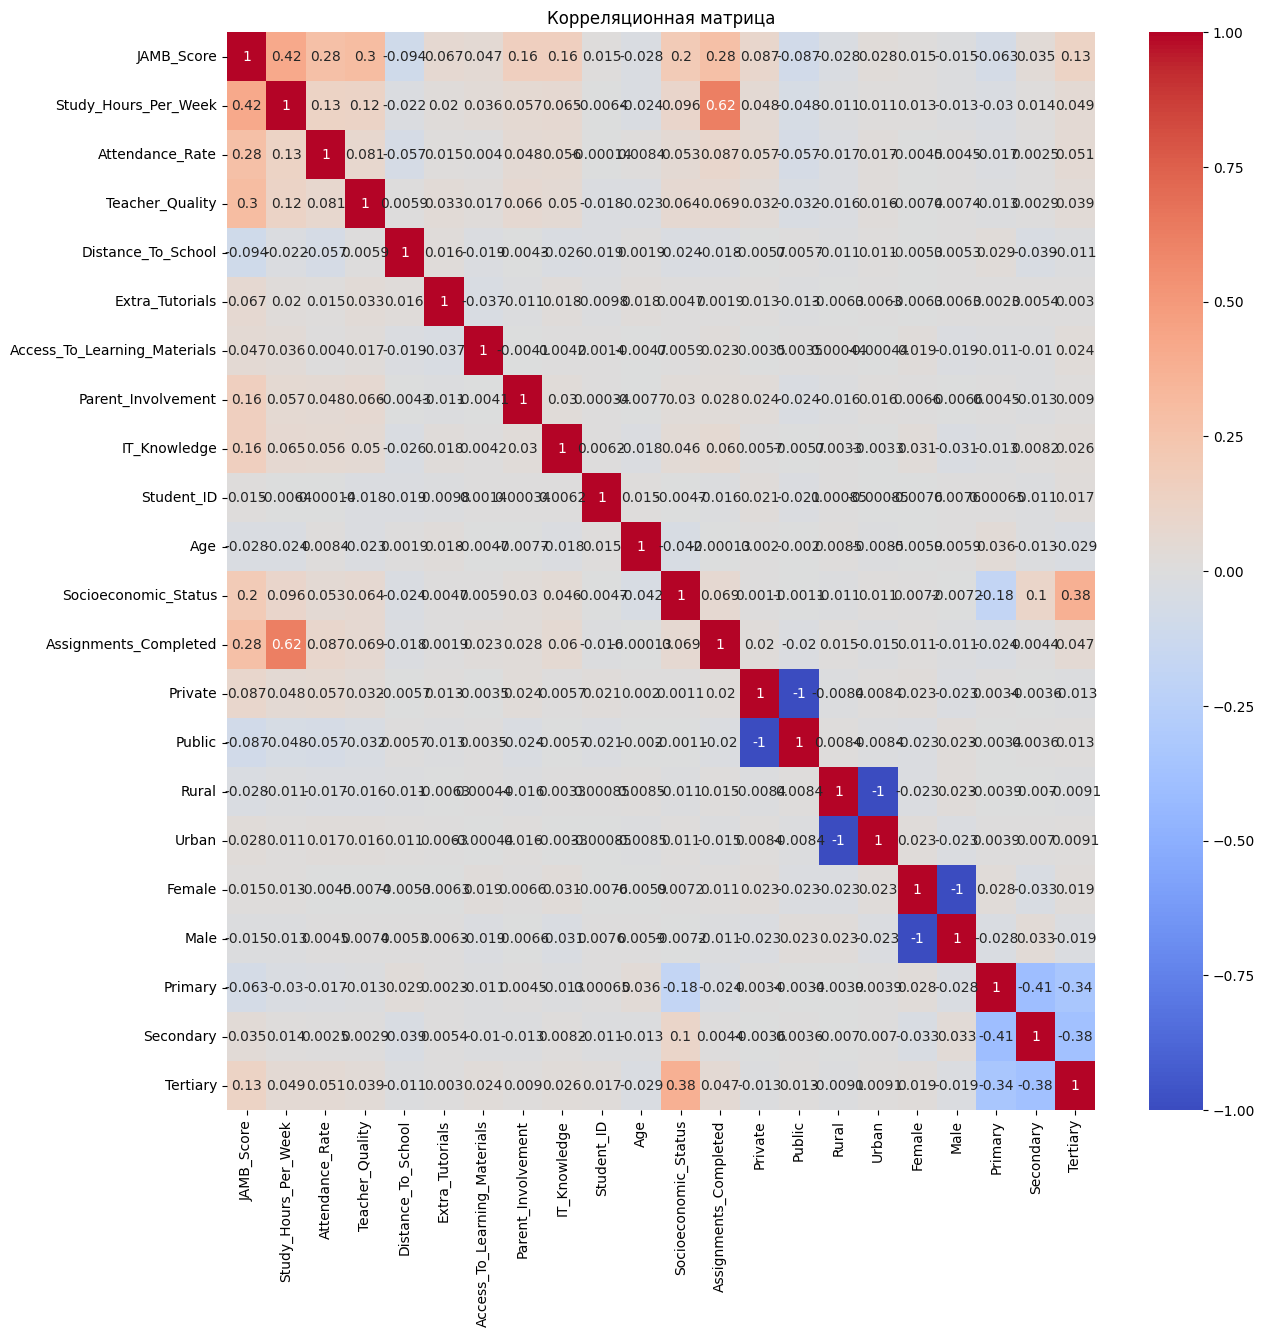

In [64]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [66]:
train_x, valid_x, train_y, valid_y = train_test_split(data.to_numpy()[:,1:], scale(data.to_numpy()[:, 0]), random_state=1, train_size=0.6)
valid_x, test_x, valid_y, test_y = train_test_split(valid_x, valid_y, random_state=1, test_size=0.5)

Обучим дерево

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
model = DecisionTreeRegressor(
    max_depth=1
)

In [87]:
model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=1)

In [84]:
from sklearn.tree import plot_tree

Какой признак используется для разбиения данных?

Ответ: study_hours_per_week т.к это первый элемент в дата сете

[Text(0.5, 0.75, 'x[0] <= 21.5\nsquared_error = 0.984\nsamples = 3000\nvalue = -0.009'),
 Text(0.25, 0.25, 'squared_error = 0.768\nsamples = 1758\nvalue = -0.306'),
 Text(0.75, 0.25, 'squared_error = 0.989\nsamples = 1242\nvalue = 0.41')]

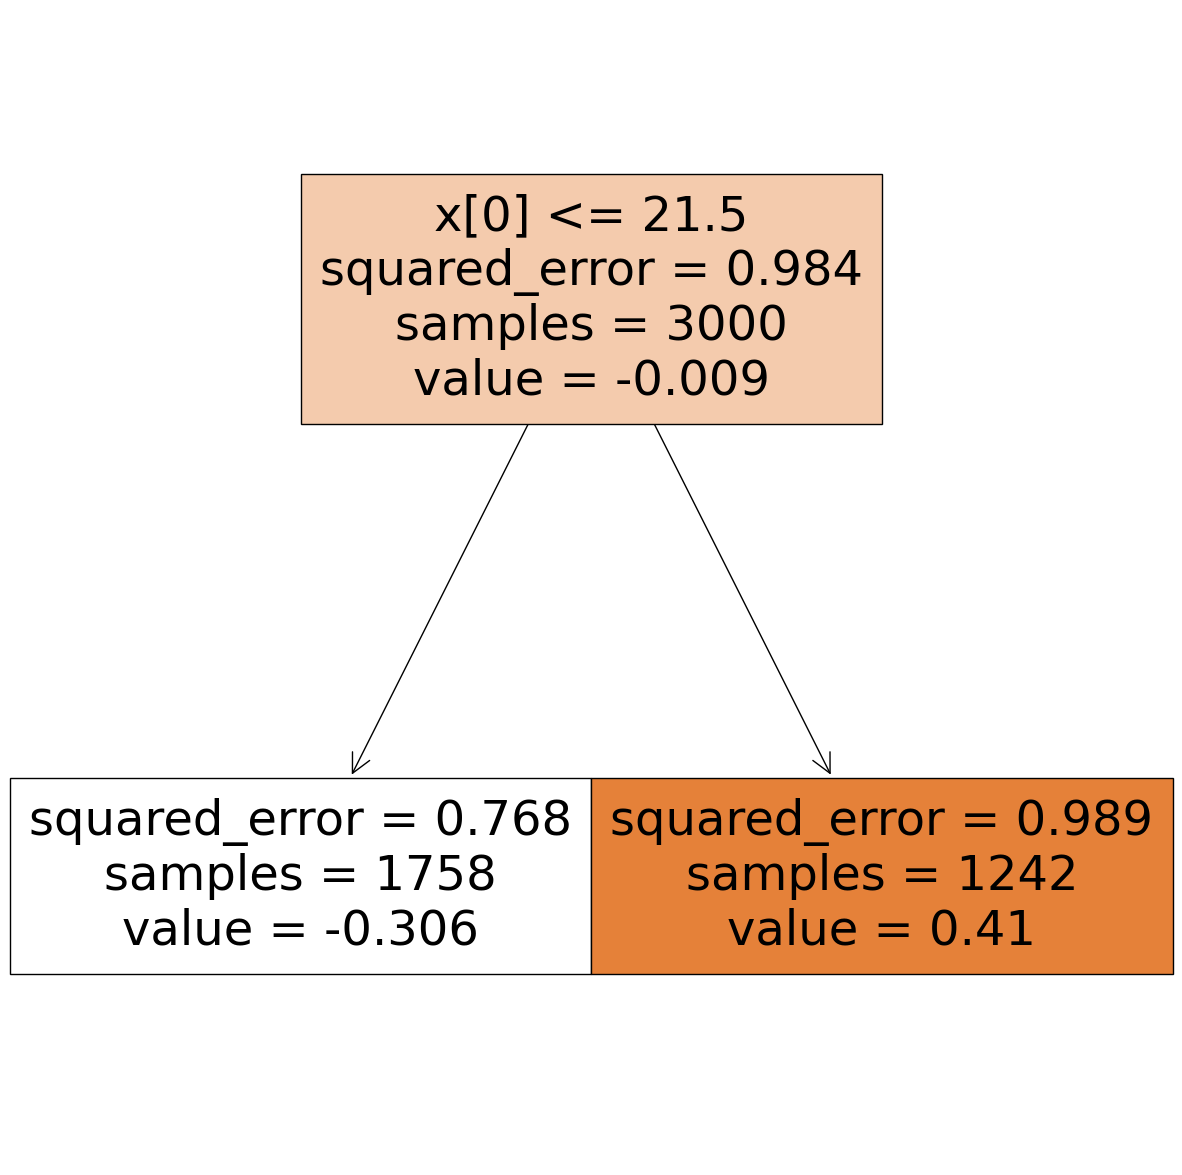

In [88]:
plt.figure(figsize=(15,15))
plot_tree(model, filled=True, impurity=True) 

In [89]:
model.score(test_x, test_y)

0.1391371066982181

Обучим randomForest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
model = RandomForestRegressor(
    n_estimators=10,
    random_state=1
)

In [92]:
model.fit(train_x, train_y)

RandomForestRegressor(n_estimators=10, random_state=1)

In [95]:
from sklearn.metrics import mean_squared_error

Какое значение RMSE у этой модели на валидационных данных?

In [98]:
mean_squared_error(model.predict(valid_x), valid_y)

0.767598022042537

После какого значения n_estimators RMSE перестает улучшаться? Учтите точность до 3 знаков после запятой.

In [104]:
from tqdm import tqdm

In [105]:
acc = []
for n_estimators in tqdm(range(10, 200, 1)):
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=1
    )
    model.fit(train_x, train_y)
    acc.append(mean_squared_error(model.predict(valid_x), valid_y))

100%|██████████| 190/190 [05:16<00:00,  1.67s/it]


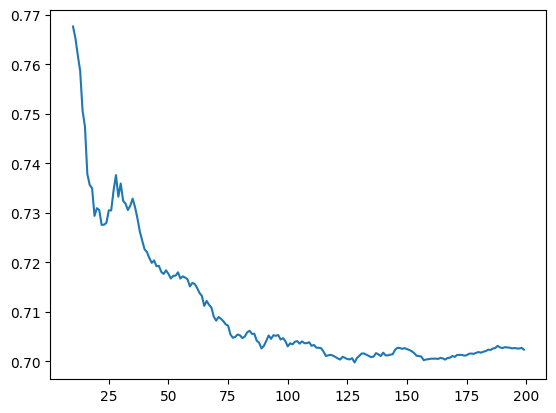

In [106]:
plt.plot(range(10, 200, 1), acc)

Ответ: 80

Какое значение max_depth оказалось лучшим по среднему RMSE?

In [107]:
acc = []
for max_depth in tqdm(range(10, 25, 1)):
    model = RandomForestRegressor(
        n_estimators=125,
        max_depth=max_depth,
        random_state=1
    )
    model.fit(train_x, train_y)
    acc.append(mean_squared_error(model.predict(valid_x), valid_y))

100%|██████████| 15/15 [00:27<00:00,  1.86s/it]


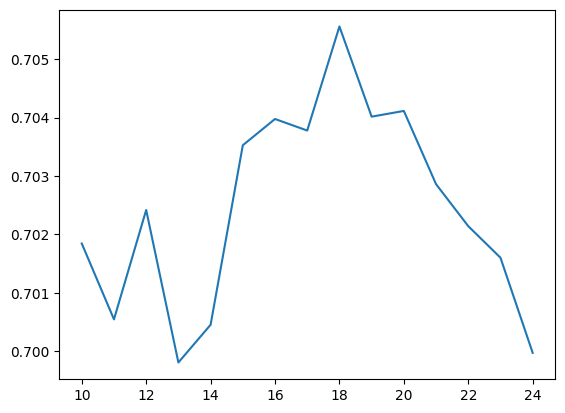

In [108]:
plt.plot(range(10, 25, 1), acc)

Ответ: 13

In [110]:
model = RandomForestRegressor(
    max_depth=10,
    n_estimators=20,
    random_state=1
)

In [111]:
model.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=1)

Какой признак оказался самым важным (из этих четырех)?

In [114]:
model.feature_importances_

array([0.28171584, 0.14641945, 0.09483058, 0.10210171, 0.01422239,
       0.01231772, 0.04323764, 0.02638742, 0.10605663, 0.04363357,
       0.03190301, 0.02704654, 0.00585239, 0.00635977, 0.00733542,
       0.0066203 , 0.00651216, 0.00548446, 0.00762054, 0.01024316,
       0.01409931])

In [115]:
model.feature_importances_.argmax()

0

Ответ: study_hours_per_week

XGBoost:

In [116]:
%pip install XGBoost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 812.7 kB/s eta 0:02:34
   ---------------------------------------- 0.2/124.9 MB 1.8 MB/s eta 0:01:10
   ---------------------------------------- 0.3/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.4/124.9 MB 1.9 MB/s eta 0:01:05
   ---------------------------------------- 0.6/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 0.8/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 0.9/124.9 MB 2.6 MB/s eta 0:00:47
   ---------------------------------------- 1.1/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 1.1/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.1/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.3/124.9 MB 2.4 MB/s eta 0:00:5

"DOSKEY" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [118]:
import xgboost as xgb
from xgboost import DMatrix

In [120]:
data_train = xgb.DMatrix(train_x, label=train_y)
data_valid = xgb.DMatrix(valid_x, label=valid_y)

In [123]:
evals = [(data_train, 'train'), (data_valid, 'validation')]

In [124]:
acc = []
for eta in [0.1, 0.3]:
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(params=xgb_params, dtrain=data_train, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=False)
    acc.append(model.best_score)
    

In [125]:
acc

[0.844925806372946, 0.849070839481333]

Какое значение eta приводит к лучшему значению RMSE на валидационном наборе данных?
при данных значения 0.1 лучше, но их различия минимальны так что они почти эквивалентны